# F20DL Lab 3

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas dataframe
ds = pd.read_csv("./datasets/Dry_Bean_Dataset.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Parsing dataset

The dataset is stored in a local CSV file. This is read and the target feature (Class) is separated from the other features.

In [4]:
dataset = pd.read_csv("./datasets/Dry_Bean_Dataset.csv")

X = dataset.drop("Class", axis=1)
y = dataset["Class"]

The rows are then scrambled to create the training and the test data. 25% of the rows are put aside as test data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.75)

X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
10129,23307,559.695,199.893862,148.644396,1.344779,0.668606,23654,172.265476,0.728868,0.985330,0.934961,0.861785,0.008577,0.002918,0.742673,0.998731
13479,40544,759.063,285.088347,181.520839,1.570554,0.771097,41076,227.205247,0.775873,0.987048,0.884262,0.796964,0.007032,0.001750,0.635152,0.997541
3240,84221,1205.045,397.284229,271.956410,1.460838,0.728977,86303,327.465277,0.705014,0.975876,0.728826,0.824259,0.004717,0.001343,0.679404,0.992499
10162,23797,570.158,204.581107,148.752383,1.375313,0.686524,24089,174.066888,0.705891,0.987878,0.919902,0.850845,0.008597,0.002779,0.723938,0.995641
1413,41864,739.821,253.736601,210.595361,1.204854,0.557799,42166,230.874209,0.774542,0.992838,0.961164,0.909897,0.006061,0.002563,0.827913,0.997514


## K-Nearest Neighbours

The dataset can be fit to a k-nearest neighbours model with number of neighbours as 3.

In [6]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
print("Accuracy: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy: 0.727


## Classifier

In [8]:
ds0 = ds[ds.columns.difference(["Class"])]    # Original dataset without 'Class' attribute
target = ds["Class"]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)          # 3-nn classifier

In [10]:
from sklearn.model_selection import train_test_split

data_train0, data_test0, target_train0, target_test0 = train_test_split(ds0, target, random_state=6)    # Original

In [11]:
knn.fit(data_train0, target_train0)
prediction = knn.predict(data_test0)
knn.score(data_test0, target_test0)   # Original dataset

0.7202468410226271

Lab4 Part 2: 
Accuracy

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test0, prediction)

0.7202468410226271

Lab4 Part 2: 
TP

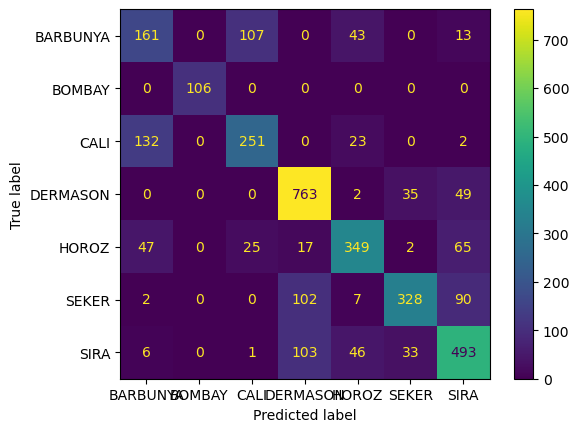

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(target_test0, prediction, labels=knn.classes_)

knn.fit(data_train0, target_train0)
prediction = knn.predict(data_test0)
knn.score(data_test0, target_test0)   # Original dataset

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [14]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# For SIRA
fp = FP[6]
fn = FN[6]
tp = TP[6]
tn = TN[6]

# True positive rate
TPR = tp/(tp+fn)
# False positive rate
FPR = fp/(fp+tn)

# Accuracy for SIRA

(TPR, FPR)

(0.7228739002932552, 0.0804851157662624)

In [15]:
#Lab 4 part 3

#Precision
precision = tp/(tp+fp)

#Recall
recall = tp/(tp+fn)

#F-measure
Fmeasure = (2 * recall * precision) / (recall + precision)

#Display
(precision, recall, Fmeasure)

(0.6924157303370787, 0.7228739002932552, 0.7073170731707318)

## ROC Curve

In [16]:
# Convert target class to be true for bean type "SIRA" and false otherwise
target_train_sira = (target_train0 == "SIRA")
target_test_sira = (target_test0 == "SIRA")

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Predicted probability score using Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=6)
target_score = cross_val_predict(rfc, data_train0, target_train_sira, cv=5, method="predict_proba")
target_score = target_score[:,1]
target_score

array([0.07, 0.  , 0.04, ..., 0.  , 1.  , 0.  ])

In [18]:
from sklearn.metrics import roc_curve

# Get fpr and tpr values for roc curve
fpr, tpr, threshold = roc_curve(target_train_sira, target_score)

In [19]:
from sklearn.metrics import roc_auc_score

# Calculate area under roc curve
roc_area = roc_auc_score(target_train_sira, target_score)

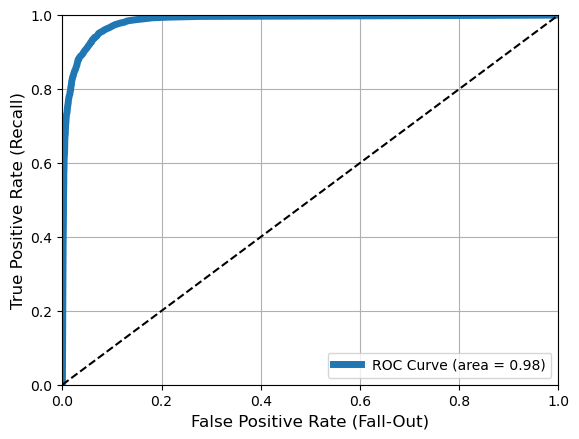

In [20]:
# Plot roc curve
plt.figure()
plt.plot(fpr, tpr, linewidth=5, label="ROC Curve (area = {:.2f})".format(roc_area))
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    # Not shown
plt.grid(True)                                            # Not shown
plt.legend(loc="lower right")
plt.show()